In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from Utilities.operators import make_tree
from Utilities.time_extractor import days_since_distruption
matplotlib.rcParams['figure.dpi'] = 150

In [22]:
folder = 'TDE'
is_tde = True
snap = '196'
m = 5
beta = 2
path = f'{folder}/{snap}'
Rt = (10**m)**(1/3)
Rp =  Rt / beta

In [3]:
sim_tree, X, Y, Z, Vol, VX, VY, VZ, IE, Den, Press, Temp, Diss, Entropy = make_tree(path, snap, is_tde, energy = True)
dim_cell = Vol**(1/3) # according to Elad
time, tfb = days_since_distruption(f'{path}/snap_{snap}.h5', m=m, choose = 'tfb')
Star = np.load(f'{path}/Star_{snap}.npy')

In [4]:
# Import data for shockzone
shockzone = np.loadtxt(f'data/{snap}/MASKshockzone_{snap}.txt')

idx_zone = shockzone[0]
idx_zone = np.array([int(i) for i in idx_zone])
x_zone = X[idx_zone]
y_zone = Y[idx_zone]
z_zone = Z[idx_zone]
Vx_zone = VX[idx_zone]
Vy_zone = VY[idx_zone]
Diss_zone = Diss[idx_zone]
dim_cell_zone = dim_cell[idx_zone]
print('Check if the shocked cells are over the density threshold. Min: ', np.min(Den[idx_zone]))


Check if the shocked cells are over the density threshold. Min:  1.0000538264810136e-09


In [5]:
# cfr tidal disrutption 
xRt = np.linspace(-Rt, Rt, 100)
yRt = np.linspace(-Rt, Rt, 100)
xcfr, ycfr = np.meshgrid(xRt,yRt)
cfr = xcfr**2 + ycfr**2 - Rt**2

In [6]:
# Cross section at the midplane (z=0)
X_cross = X[np.abs(Z) < dim_cell]
Y_cross = Y[np.abs(Z) < dim_cell]
VX_cross = VX[np.abs(Z) < dim_cell]
VY_cross = VY[np.abs(Z) < dim_cell]
Vol_cross = Vol[np.abs(Z) < dim_cell]
Temp_cross = Temp[np.abs(Z) < dim_cell]
Den_cross = Den[np.abs(Z) < dim_cell]
Diss_cross = Diss[np.abs(Z) < dim_cell]
Entropy_cross = Entropy[np.abs(Z) < dim_cell]
Star_cross = Star[np.abs(Z) < dim_cell]

zone_cross_x = x_zone[np.abs(z_zone)< dim_cell_zone]
zone_cross_y = y_zone[np.abs(z_zone)< dim_cell_zone]

In [7]:
def to_cylindric(x,y):
    if x.any() == 0:
        if y.any()>0:
            theta_coord = np.pi/2
        elif y.any() == 0:
            theta_coord = 0
        else:
            theta_coord = 3/2 * np.pi
    else:
        theta_coord = np.arctan2(y,x)
    radius = np.sqrt(x**2+y**2)
    return radius, theta_coord

def from_cylindric(r,theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def keplerian_orbit(theta, p = Rt, ecc = 0.999):
    radius = p / (1 + ecc * np.cos(theta))
    return radius

# def eq_motion(x0, y0, t, r_vel = Rp, M_bh = 10**m):
#     vel = M_bh / r_vel**3 # G = 1
#     x = x0 + 
#     y = x0 + vel * t
#     return x, y 

theta_arr = np.arange(0, 2*np.pi, 0.01)
orbit = keplerian_orbit(theta_arr)
x_orbit, y_orbit = from_cylindric(orbit, theta_arr) 


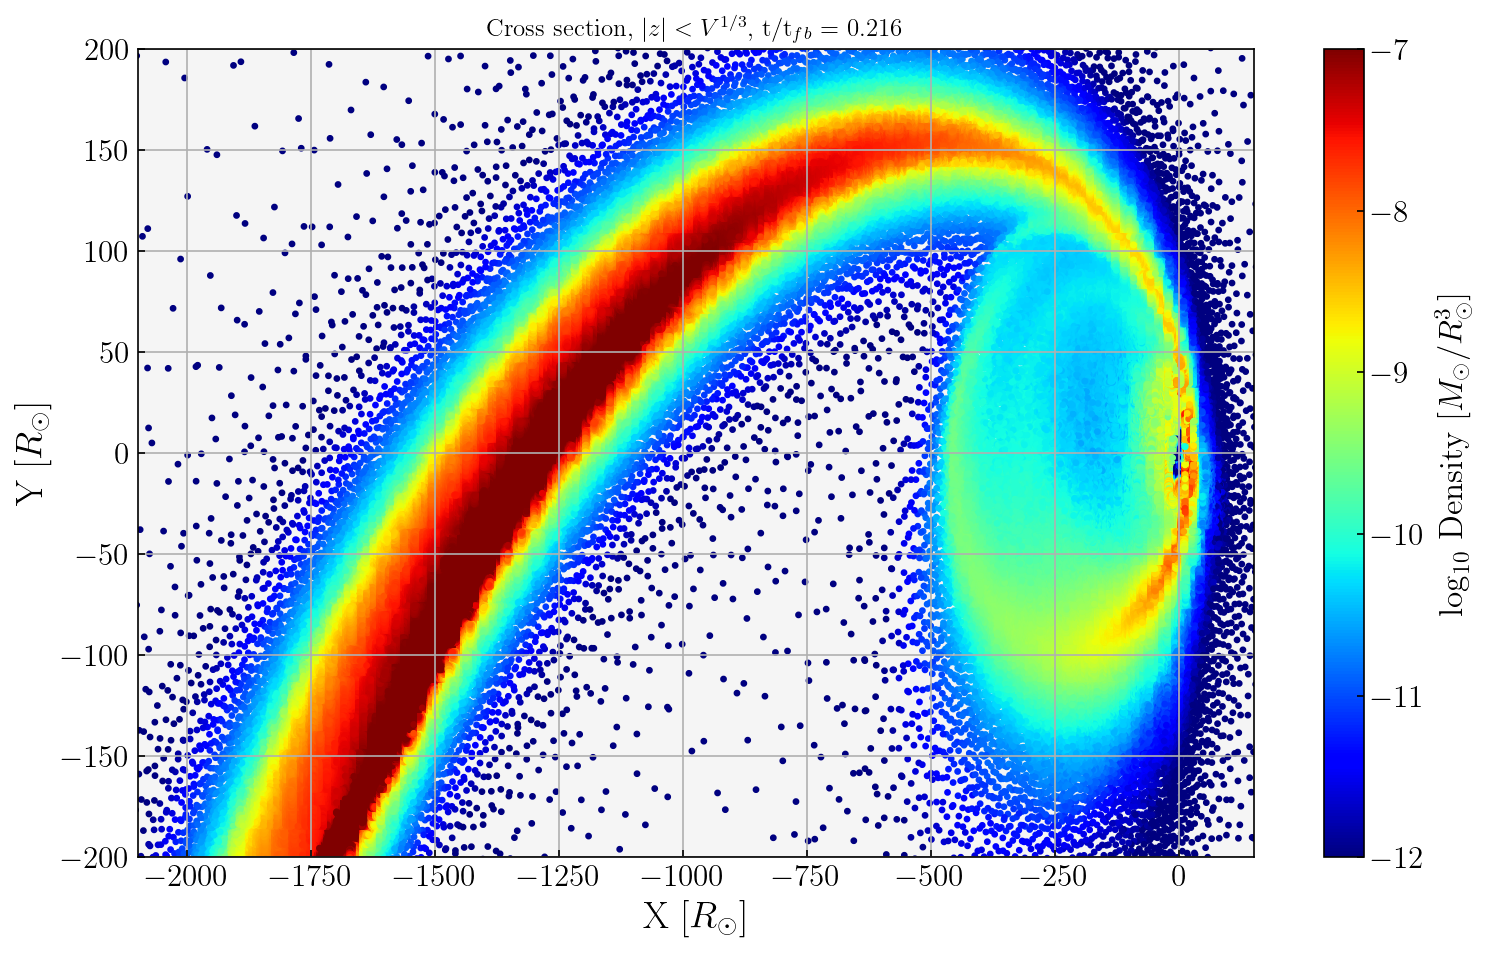

In [8]:
# Visualize the snapshot
fig, ax = plt.subplots(1,1, figsize = (12,7))
img = ax.scatter(X_cross, Y_cross, c = np.log10(Den_cross), s = 5, cmap = 'jet', vmin = -12, vmax = -7)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density [$M_\odot/R_\odot^3$]', fontsize = 16)
ax.set_xlim(-2100,150)
ax.set_ylim(-200,200)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()

plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig('Figs/196/Density.png')

Text(0.5, 1.0, 'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = 0.216')

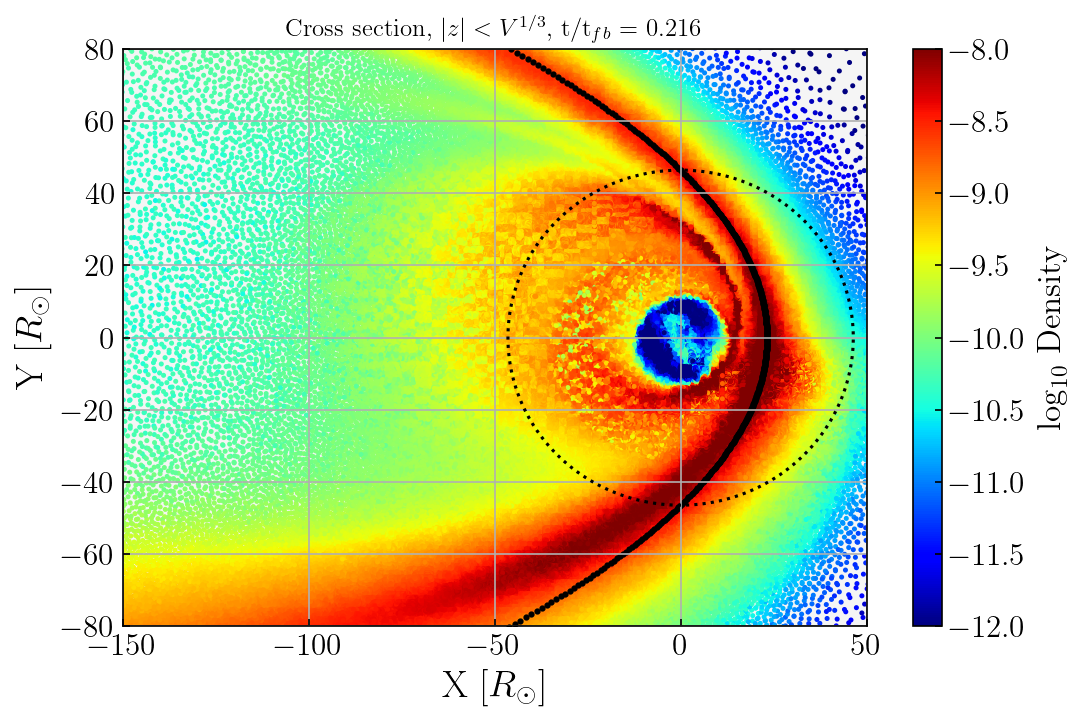

In [9]:
fig, ax = plt.subplots(1,1, figsize = (8,5))
img = ax.scatter(X_cross, Y_cross, c = np.log10(Den_cross), s = 2, cmap = 'jet', vmin = -12, vmax = -8)
#ax.quiver(X_cross[::50], Y_cross[::50], VX_cross[::50], VY_cross[::50], color = 'k', angles='xy', scale_units='xy', width = 1e-3)#, scale = 40)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
ax.scatter(x_orbit, y_orbit, color = 'k', s = 4)
ax.set_xlim(-150,50)
ax.set_ylim(-80,80)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

Temperature 

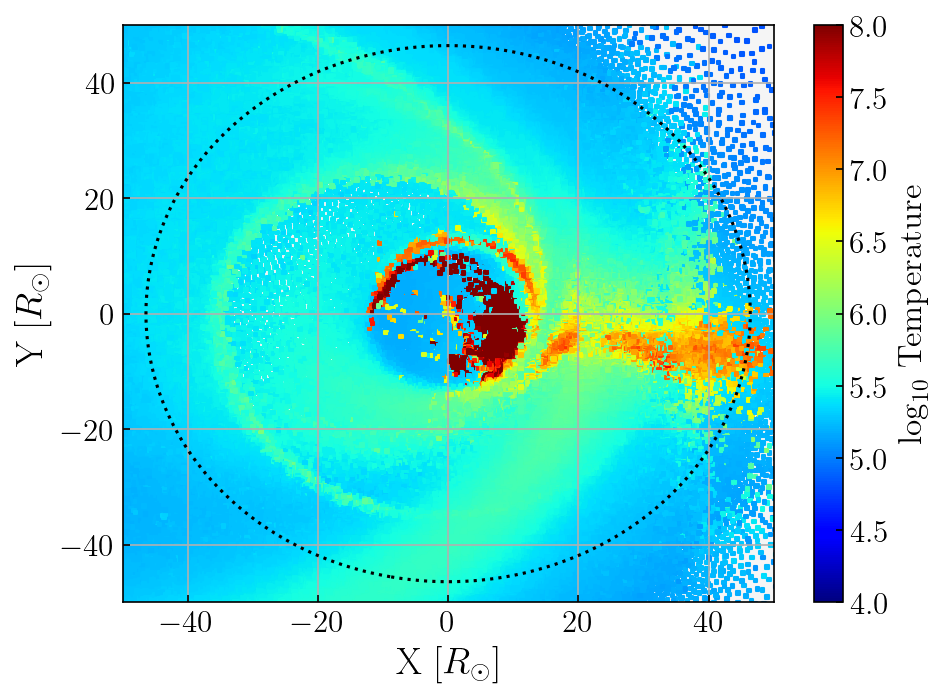

In [10]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(X_cross, Y_cross, c = np.log10(Temp_cross), marker= 's', s = 3, cmap = 'jet', vmin = 4, vmax = 8)
ax.contour(xcfr, ycfr, cfr, [0], linestyles = 'dotted', colors = 'k')
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'$\log_{10}$ Temperature', fontsize = 16)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
#plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))

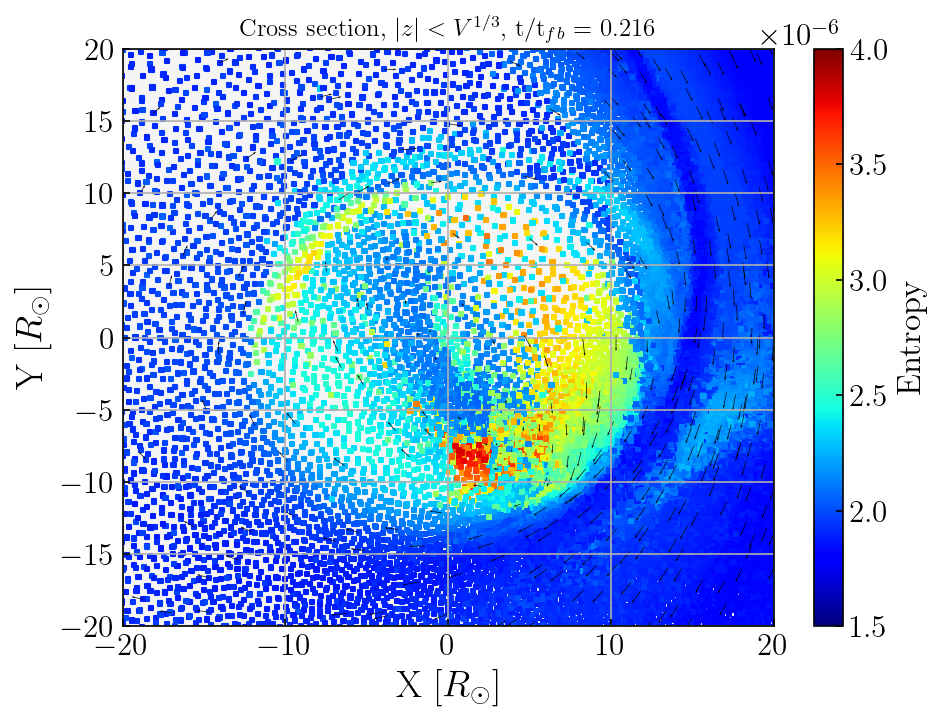

In [11]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(X_cross, Y_cross, c = Entropy_cross, marker= 's', s = 4, cmap = 'jet', vmin = 1.5e-6, vmax = 4e-6)
ax.quiver(X_cross[::50], Y_cross[::50], VX_cross[::50], VY_cross[::50], color = 'k', angles='xy', scale_units='xy', width = 1e-3)#, scale = 40)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'Entropy', fontsize = 16)
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig(f'Figs/EntropyXY_{snap}.png')

Y-Z plane

In [12]:
xchosen = 20
Y_crossYZ = Y[np.abs(X-xchosen) < dim_cell]
Z_crossYZ = Z[np.abs(X-xchosen) < dim_cell]
VY_crossYZ = VY[np.abs(X-xchosen) < dim_cell]
VZ_crossYZ = VZ[np.abs(X-xchosen) < dim_cell]
Temp_crossYZ = Temp[np.abs(X-xchosen) < dim_cell]
Den_crossYZ = Den[np.abs(X-xchosen) < dim_cell]

Text(0.5, 1.0, 'Cross section, X = 20R$_\\odot$')

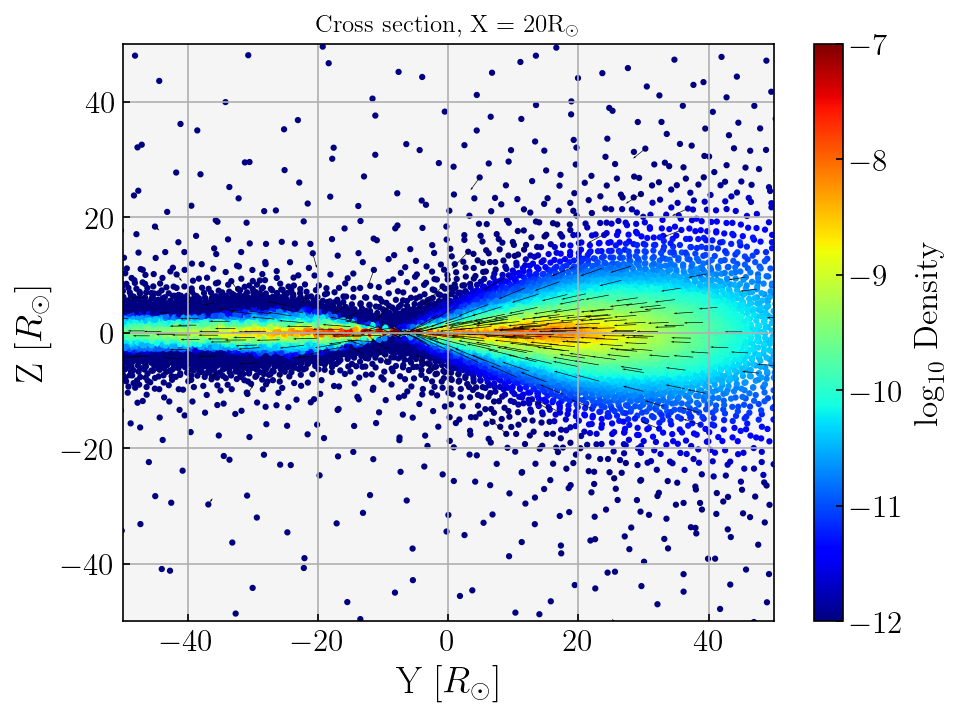

In [13]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(Y_crossYZ, Z_crossYZ, c = np.log10(Den_crossYZ),  s = 4, cmap = 'jet', vmin = -12, vmax = -7)
ax.quiver(Y_crossYZ[::50], Z_crossYZ[::50], VY_crossYZ[::50], VZ_crossYZ[::50], color = 'k', angles='xy', scale_units='xy', width = 1e-3)#, scale = 40)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.set_xlim(-50,50)
ax.set_ylim(-50,50)
ax.set_xlabel(r'Y [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(f'Cross section, X = {xchosen}' + r'R$_\odot$')


In [14]:
ychosen = -5
X_crossXZ = X[np.abs(Y-ychosen) < dim_cell]
Z_crossXZ = Z[np.abs(Y-ychosen) < dim_cell]
VX_crossXZ = VX[np.abs(Y-ychosen) < dim_cell]
VZ_crossXZ = VZ[np.abs(Y-ychosen) < dim_cell]
Temp_crossXZ = Temp[np.abs(Y-ychosen) < dim_cell]
Den_crossXZ = Den[np.abs(Y-ychosen) < dim_cell]

Text(0.5, 1.0, 'Cross section, Y = -5R$_\\odot$')

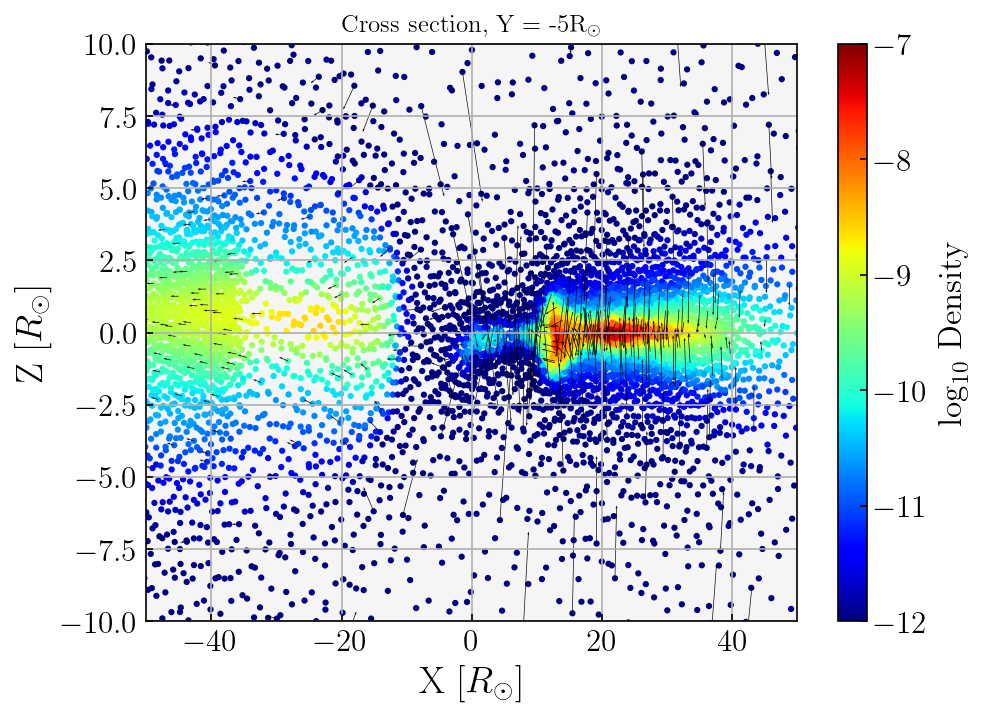

In [15]:
fig, ax = plt.subplots(1,1, figsize = (7,5))
img = ax.scatter(X_crossXZ, Z_crossXZ, c = np.log10(Den_crossXZ),  s = 4, cmap = 'jet', vmin = -12, vmax = -7)
ax.quiver(X_crossXZ[::20], Z_crossXZ[::20], VX_crossXZ[::20], VZ_crossXZ[::20], color = 'k', angles='xy', scale_units='xy', width = 1e-3, scale = 20)
cbar = plt.colorbar(img)
cbar.set_label(r'$\log_{10}$ Density', fontsize = 16)
ax.set_xlim(-50,50)
ax.set_ylim(-10,10)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(f'Cross section, Y = {ychosen}' + r'R$_\odot$')

Shiokawa+15 (note that you have to considr the tangent plane at pericenter, i.e. a cross section along X=Rt for us)

In [16]:
# Y-Z plane with Y=Ypericenter
conditions = np.abs(X-Rt)< dim_cell
Y_shio = Y[conditions]
Z_shio = Z[conditions]
Entropy_shio = Entropy[conditions]
VY_shio = VY[conditions]
VZ_shio = VZ[conditions]

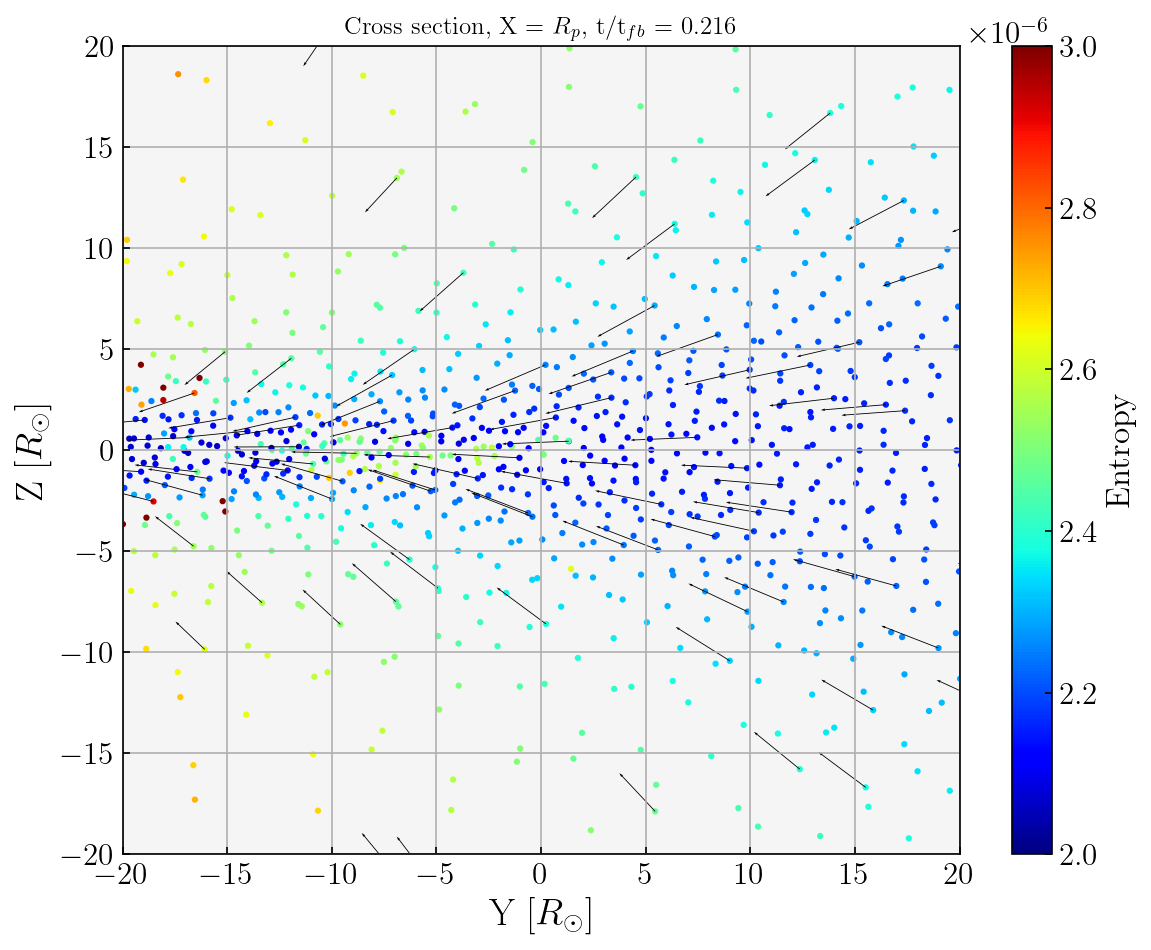

In [17]:
fig, ax = plt.subplots(1,1, figsize = (9,7))
img = ax.scatter(Y_shio, Z_shio, c = Entropy_shio, s = 4, cmap = 'jet', vmin = 2e-6, vmax = 3e-6)
ax.quiver(Y_shio[::10], Z_shio[::10], VY_shio[::10], VZ_shio[::10], color = 'k', angles='xy', scale_units='xy', width = 1e-3, scale = 20)
#ax.plot(x_zone, z_zone, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k')
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'Entropy', fontsize = 16)
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.set_xlabel(r'Y [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Z [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, X = $R_p$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig(f'Figs/EntropyYZ_{snap}.png')

In [18]:
shocksurface = np.loadtxt(f'data/{snap}/MASKshocksurface_{snap}.txt')

idx_surf = shocksurface[0]
idx_surf = np.array([int(i) for i in idx_surf])
x_surf = x_zone[idx_surf]
y_surf = y_zone[idx_surf]
z_surf = z_zone[idx_surf]

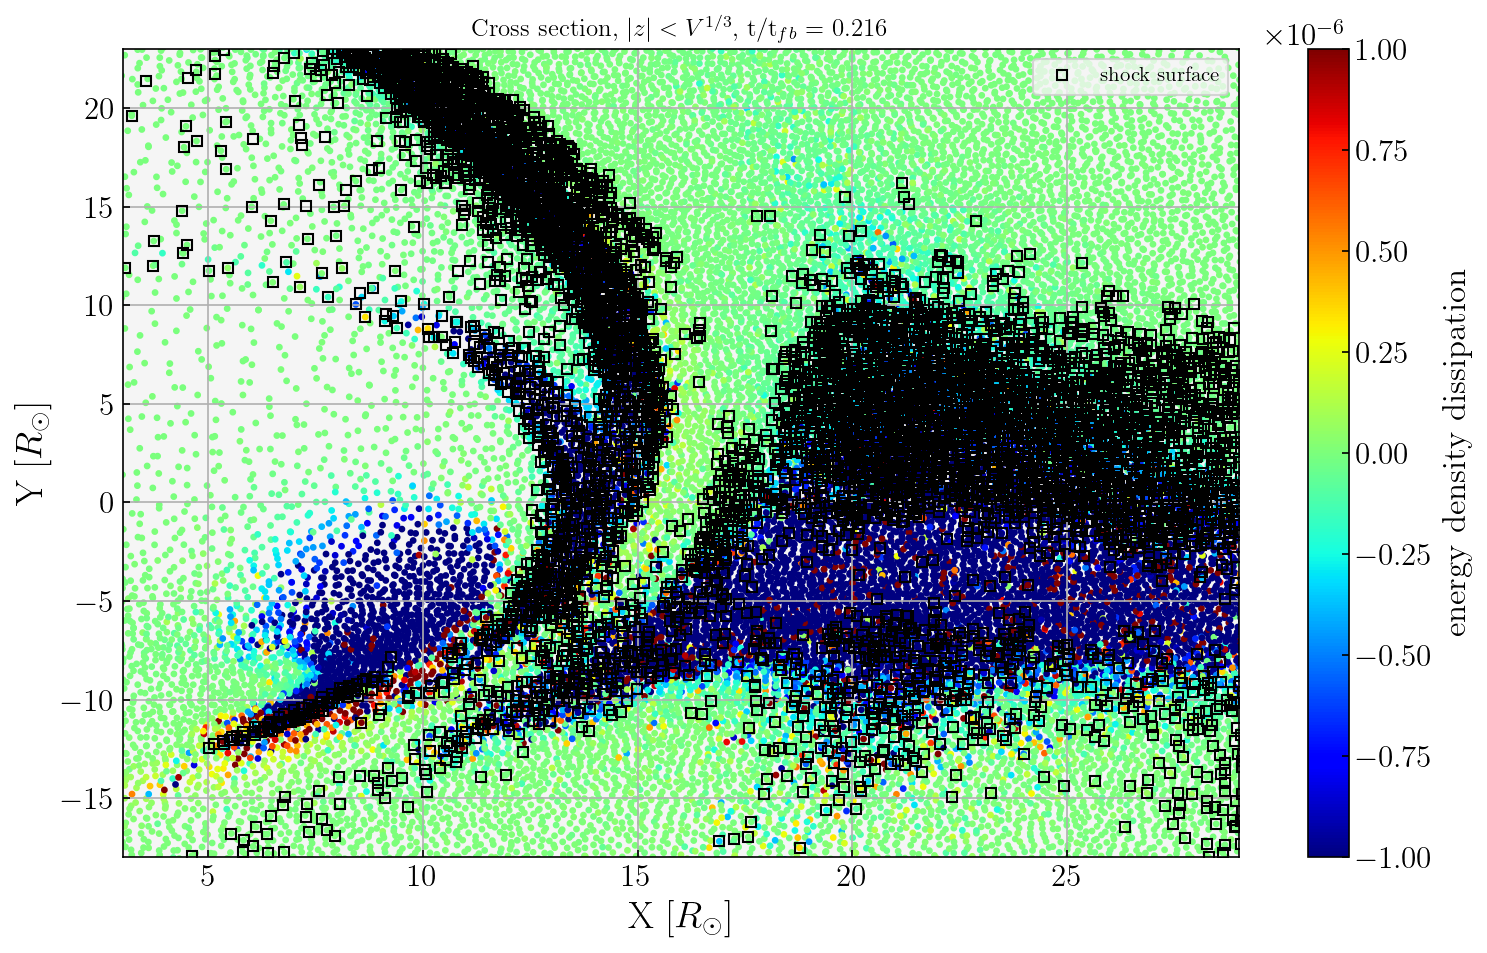

In [19]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
img = ax.scatter(X_cross, Y_cross, c = Diss_cross/Vol_cross, s = 5, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label('energy density dissipation', fontsize = 16)
#ax.plot(x_zone, y_zone, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k', label = 'shock zone')
ax.plot(x_surf, y_surf, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k', label = 'shock surface')
ax.set_xlim(3,29)
ax.set_ylim(-18,23)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.legend(loc = 'upper right')
#plt.savefig('Figs/EnDisszone.png')

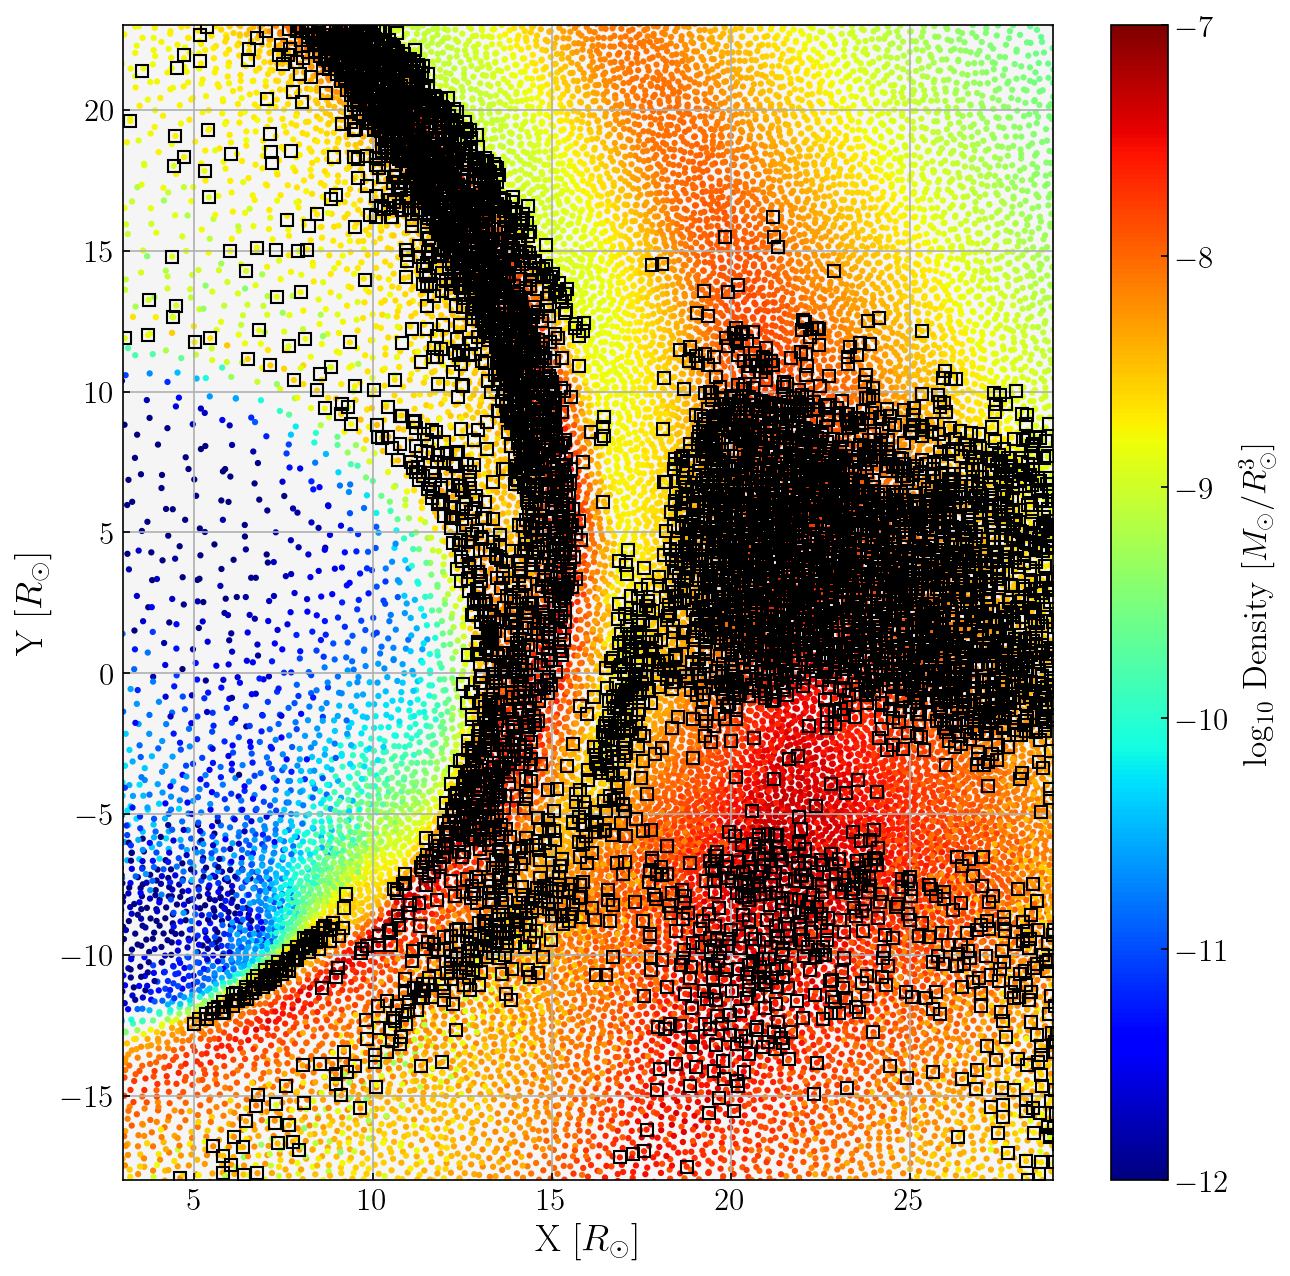

In [20]:
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.plot(x_surf, y_surf, 'ks', markerfacecolor='none', ms = 6, markeredgecolor='k')
img = ax.scatter(X_cross, Y_cross, c = np.log10(Den_cross), s = 4, cmap = 'jet', vmin = -12, vmax = -7)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'$\log_{10}$ Density [$M_\odot/R_\odot^3$]', fontsize = 16)
ax.set_xlim(3,29)
ax.set_ylim(-18,23)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
#plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)), fontsize = 15)
plt.savefig('Figs/Densityshock.png')

NameError: name 'vx_surf' is not defined

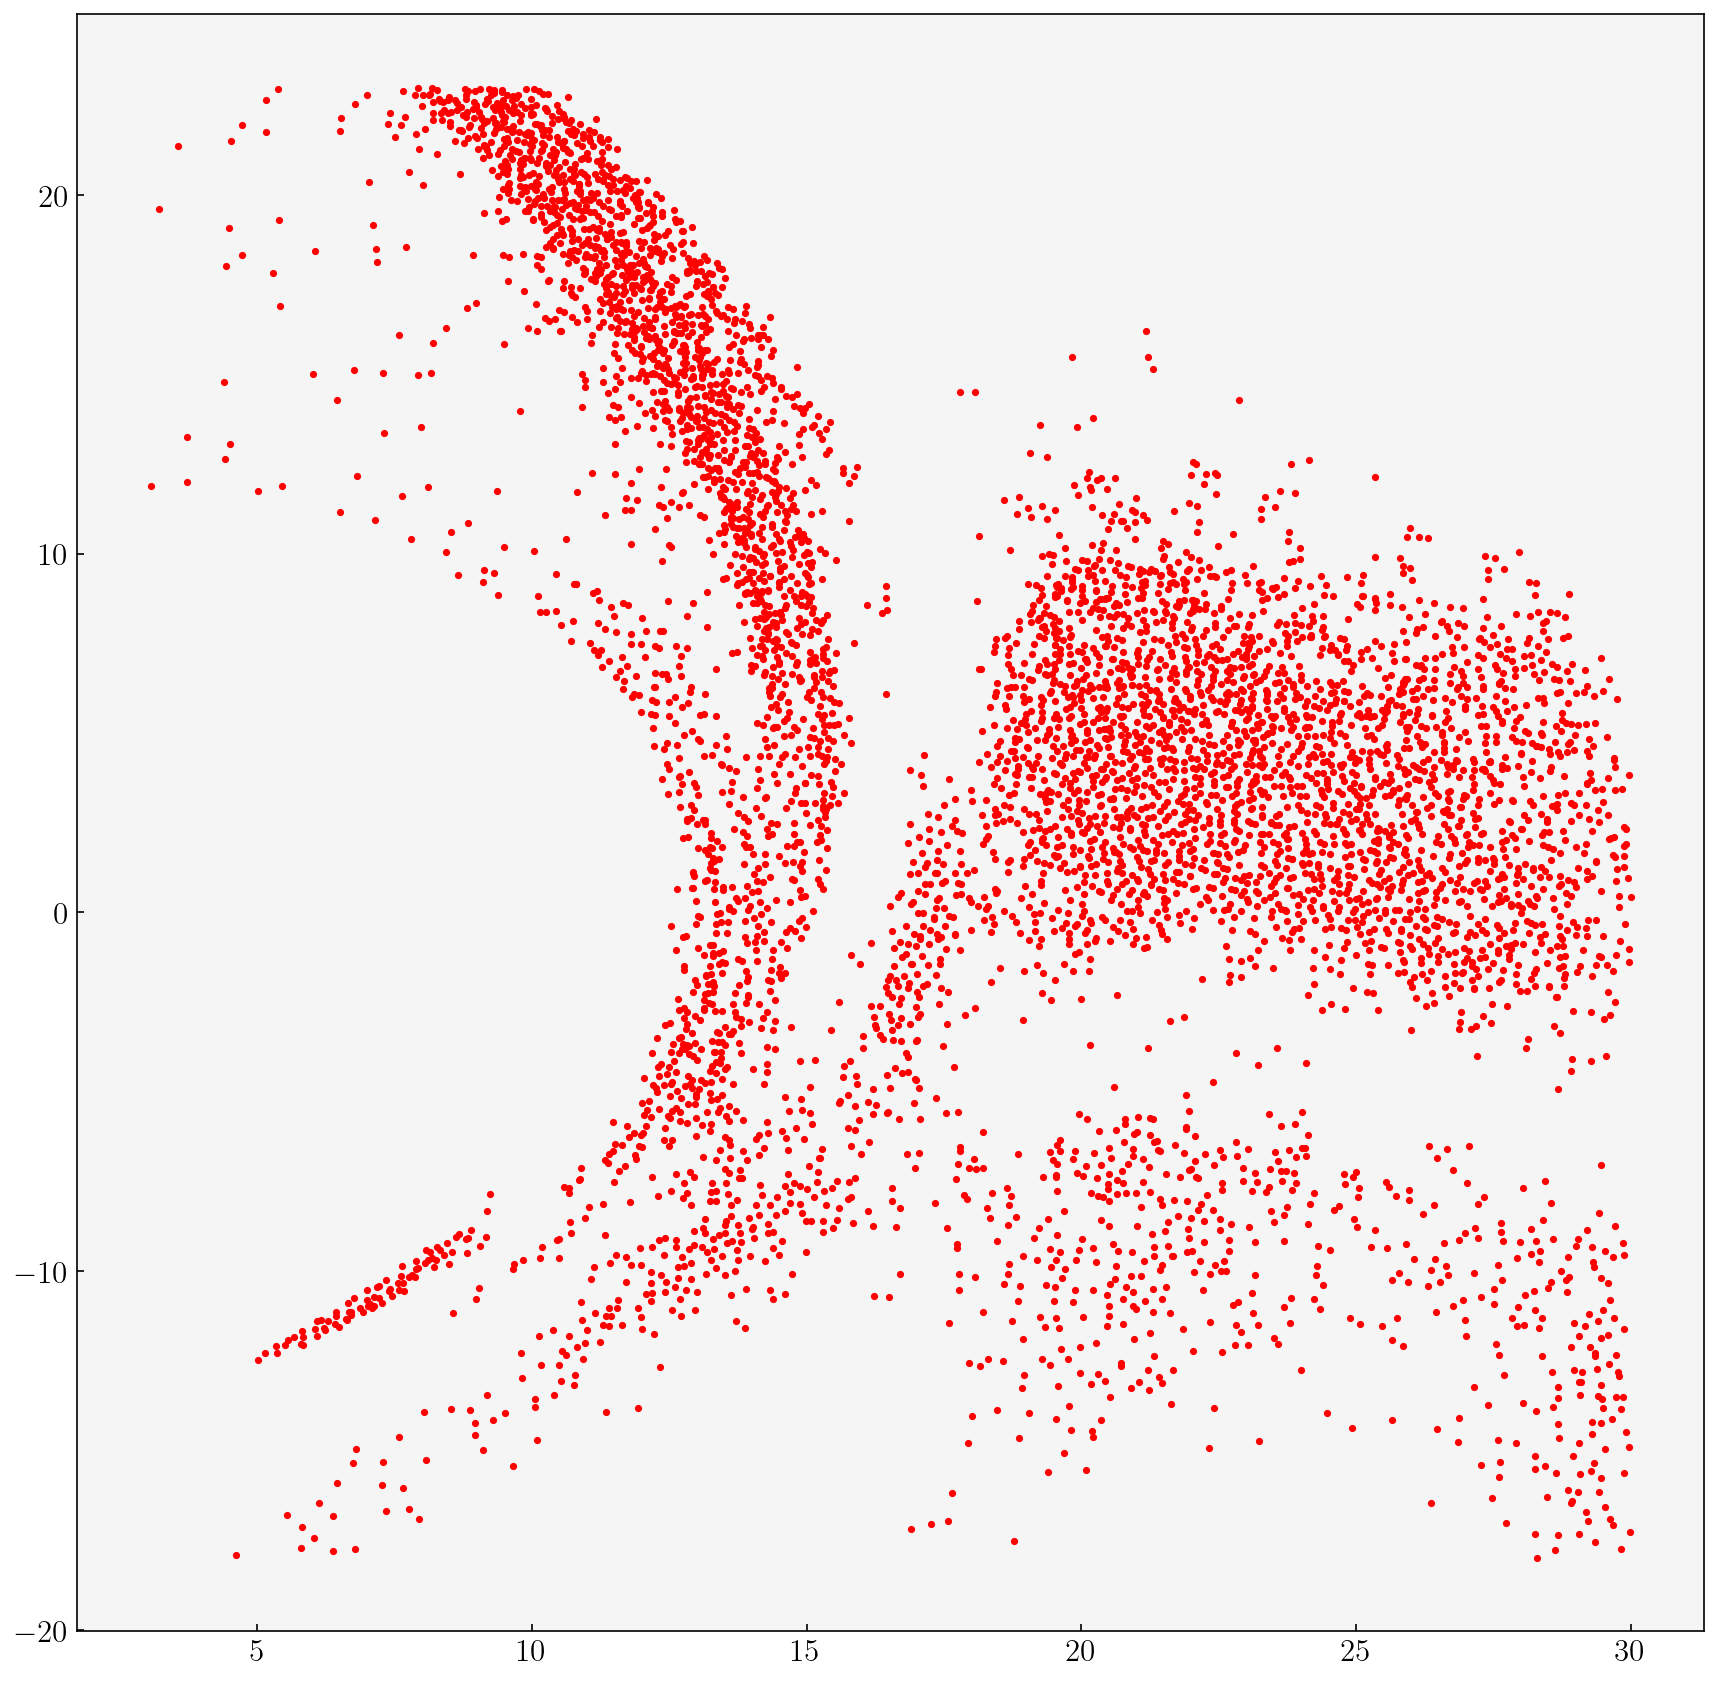

In [21]:
fig, ax = plt.subplots(1,1, figsize = (14,14))
ax.scatter(x_surf, y_surf,  c = 'r',s = 6)
ax.quiver(x_surf[::20], y_surf[::20], vx_surf[::20], vy_surf[::20], color = 'k', angles='xy', scale_units='xy', width = 1.5e-3, scale = 40)
ax.set_xlim(3,29)
ax.set_ylim(-18,23)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig('Figs/shockVel.png')

Elad's plot

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (10,8))
img = ax.scatter(X_cross, Y_cross, c = np.log10(Den_cross), s = 5, cmap = 'jet', vmin = -12, vmax = -7)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label(r'$\log_{10}$ Density [$M_\odot/R_\odot^3$]', fontsize = 16)
#ax.plot(x_surf, y_surf, 'ks', markerfacecolor='none', ms = 5, markeredgecolor='k')
ax.set_xlim(-10,56)
ax.set_ylim(-30,30)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
plt.savefig('Figs/Densityzoom.png')

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (12,7))
img = ax.scatter(X_cross, Y_cross, c = Diss_cross/Vol_cross, s = 5, cmap = 'jet', vmin = -1e-6, vmax = 1e-6)
cbar = plt.colorbar(img)#, format='%.0e')
cbar.set_label('energy dissipation rate [energy/(time Vol)]', fontsize = 16)
ax.set_xlim(3,46)
ax.set_ylim(-15,19)
ax.set_xlabel(r'X [$R_\odot$]', fontsize = 18)
ax.set_ylabel(r'Y [$R_\odot$]', fontsize = 18)
plt.grid()
plt.title(r'Cross section, $|z|<V^{1/3}$, t/t$_{fb}$ = ' + str(np.round(tfb,3)))
#plt.savefig('Figs/EladEnDiss.png')